In [84]:
import pandas as pd
import sklearn.model_selection
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import shapely
import geopandas
import itertools


In [1129]:
airbnb_data.columns

Index(['id', 'neighbourhood_group', 'neighbourhood', 'price',
       'number_of_reviews', 'review_scores_rating', 'property_type',
       'month_count', 'date', 'year', 'accommodates', 'accommodates_squared',
       'adjusted_price', 'adjusted_score', 'bathrooms', 'bedrooms',
       'bedrooms_per_bathrooms', 'beds', 'is_april', 'is_august',
       'is_december', 'is_february', 'is_january', 'is_june', 'is_march',
       'is_may', 'is_november', 'is_october', 'is_september', 'is_summer',
       'is_winter', 'latitude', 'log_beds_per_bedrooms',
       'log_beds_per_bedrooms_squared', 'log_price', 'log_reviews',
       'longitude', 'month', 'month_squared', 'years_since_2015',
       'years_since_2015_squared', 'is_brooklyn', 'is_house', 'is_loft',
       'is_townhouse', 'is_condominium', 'geometry'],
      dtype='object')

In [2]:
restaurant_data = pd.read_pickle("./data/pickles/restaurant_data.pkl")
airbnb_data = pd.read_pickle("./data/pickles/airbnb_data.pkl")
mta_data = pd.read_pickle("./data/pickles/mta_data.pkl")
bodega_data = pd.read_pickle("./data/pickles/bodega_data.pkl")
business_data = pd.read_pickle("./data/pickles/business_data.pkl")


In [3]:
airbnb_data["is_brooklyn"] = airbnb_data.neighbourhood_group == "Brooklyn"

In [5]:
airbnb_data.groupby("id")["month_count"].first().hist()

In [8]:
reserved_ids = []

test_ids = []

test_input = {
    (30,45): 4,
    (20,30): 4,
    (10,20): 4,
    (0,10): 4
}

for cur_key, cur_percentage in test_input.items():
    sub_data = airbnb_data[(airbnb_data.month_count > cur_key[0]) & (airbnb_data.month_count <= cur_key[1])]
    cur_id_list = list(sub_data.id.unique())

    random.shuffle(cur_id_list)
    
    cur_value = int(np.round( len(cur_id_list) * ( cur_percentage / 100 ) ))
    reserved_ids.extend(cur_id_list[0:cur_value])
    
len(reserved_ids)

355

In [9]:
def shuffle_lists(*varargs):
    c = list(zip(*varargs))
    random.shuffle(c)
    return map(list,list(zip(*c)))

In [10]:
airbnb_data["is_house"] = airbnb_data.property_type == "House"
airbnb_data["is_loft"] = airbnb_data.property_type == "Loft"
airbnb_data["is_townhouse"] = airbnb_data.property_type == "Townhouse"
airbnb_data["is_condominium"] = airbnb_data.property_type == "Condominium"


In [11]:
unused_columns = [
    'log_reviews',
    'adjusted_score',
    'month_count',
    'date'
]

unuseful_columns = [
    'is_april',
    'is_february',
    'is_november',
    'is_october',
    'is_summer',
    'month',
    'is_june',
    'is_september',
]

raw_used_columns = [
    'accommodates',
    'accommodates_squared',
    'bathrooms',
    'bedrooms',
    'bedrooms_per_bathrooms',
    'beds',
    'is_april',
    'is_august',
    'is_brooklyn',
    'is_condominium',
    'is_december',
    'is_february',
    'is_house',
    'is_january',
    'is_june',
    'is_loft',
    'is_march',
    'is_may',
    'is_november',
    'is_october',
    'is_september',
    'is_summer',
    'is_townhouse',
    'is_winter',
    'log_beds_per_bedrooms',
    'log_beds_per_bedrooms_squared',
    'month',
    'month_squared',
    'years_since_2015',
    'years_since_2015_squared'
]

used_columns = [ 
    cur_col for cur_col in raw_used_columns if cur_col not in unuseful_columns 
]


In [12]:
subset_data = airbnb_data[[*used_columns,"id","log_price"]]

used_data = subset_data[~subset_data.id.isin(reserved_ids)].drop(columns=['id'])
reserved_data = subset_data[subset_data.id.isin(reserved_ids)].drop(columns=['id'])

test_size = ( 0.2 * len(airbnb_data) - len(reserved_data) ) / len(used_data)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    used_data.loc[:, used_data.columns != 'log_price'], used_data.log_price, test_size=test_size
)

work_data = X_test.copy()
print(sorted(list(work_data.columns)))
work_data["log_price"] = y_test.values
print(sorted(list(work_data.columns)))

reserved_data = reserved_data.drop(columns=['log_price']).assign(log_price=reserved_data['log_price'])
work_data = pd.concat([work_data,reserved_data],sort=True)

work_data = work_data.sample(frac=1).reset_index(drop=True)

X_test = work_data.loc[:, work_data.columns != 'log_price']
y_test = work_data.log_price

print(round(len(X_train)/len(airbnb_data),5))
print(round(len(X_test)/len(airbnb_data),5))


['accommodates', 'accommodates_squared', 'bathrooms', 'bedrooms', 'bedrooms_per_bathrooms', 'beds', 'is_august', 'is_brooklyn', 'is_condominium', 'is_december', 'is_house', 'is_january', 'is_loft', 'is_march', 'is_may', 'is_townhouse', 'is_winter', 'log_beds_per_bedrooms', 'log_beds_per_bedrooms_squared', 'month_squared', 'years_since_2015', 'years_since_2015_squared']
['accommodates', 'accommodates_squared', 'bathrooms', 'bedrooms', 'bedrooms_per_bathrooms', 'beds', 'is_august', 'is_brooklyn', 'is_condominium', 'is_december', 'is_house', 'is_january', 'is_loft', 'is_march', 'is_may', 'is_townhouse', 'is_winter', 'log_beds_per_bedrooms', 'log_beds_per_bedrooms_squared', 'log_price', 'month_squared', 'years_since_2015', 'years_since_2015_squared']
0.8
0.2


In [13]:
subset_data = airbnb_data[[*used_columns,"id","log_price"]]

used_data = subset_data[~subset_data.id.isin(reserved_ids)].drop(columns=['id'])
reserved_data = subset_data[subset_data.id.isin(reserved_ids)].drop(columns=['id'])

test_size = ( 0.2 * len(airbnb_data) - len(reserved_data) ) / len(used_data)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    used_data.loc[:, used_data.columns != 'log_price'], used_data.log_price, test_size=test_size
)

work_data = X_test.copy()
print(sorted(list(work_data.columns)))
work_data["log_price"] = y_test.values
print(sorted(list(work_data.columns)))

reserved_data = reserved_data.drop(columns=['log_price']).assign(log_price=reserved_data['log_price'])
work_data = pd.concat([work_data,reserved_data],sort=True)

work_data = work_data.sample(frac=1).reset_index(drop=True)

X_test = work_data.loc[:, work_data.columns != 'log_price']
y_test = work_data.log_price

print(round(len(X_train)/len(airbnb_data),5))
print(round(len(X_test)/len(airbnb_data),5))

cur_poly_xform = StandardScaler()
cur_poly_xform.fit(X_train.values)

X_train_scaled = cur_poly_xform.transform(X_train.values)
X_test_scaled = cur_poly_xform.transform(X_test.values)


In [14]:

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

in_dict = {
#     "ridge": RidgeCV(cv=4, alphas=np.logspace(-2,2,100)),
    "lasso": LassoCV(cv=4, n_alphas=100), 
#     "elastic": ElasticNetCV(cv=4, n_alphas=100)
}

out_dict = {}

for cur_key, cur_cv in in_dict.items():
    cur_cv.fit(X_train_scaled, y_train)
#     out_dict[cur_key] = cur_cv.score(X_test_scaled, y_test)
    out_dict[cur_key] = cur_cv.score(X_train_scaled, y_train)
    print([cur_key, out_dict[cur_key]])

['lasso', 0.3865601358842558]


In [15]:
for cur_key, cur_cv in in_dict.items():
    print([cur_key,cur_cv.alpha_,cur_cv.intercept_])
    for ii in range(len(X_train.columns)):
        if abs(cur_cv.coef_[ii]) > 1e-6: continue
        print([X_train.columns[ii], cur_cv.coef_[ii]])

for cur_key, cur_cv in in_dict.items():
    print()
    print([cur_key,cur_cv.alpha_])
    for ii in range(len(X_train.columns)):
        if abs(cur_cv.coef_[ii]) <= 1e-3: continue
        print([X_train.columns[ii], cur_cv.coef_[ii]])

['lasso', 7.386829951150782e-05, 2.2572689481164936]

['lasso', 7.386829951150782e-05]
['accommodates', 0.04172518292900497]
['accommodates_squared', -0.017936076195660688]
['bathrooms', 0.04514973104865625]
['bedrooms', 0.038869015763681514]
['bedrooms_per_bathrooms', 0.005679496883691862]
['beds', 0.002108432444764366]
['is_brooklyn', -0.0783762501853163]
['is_condominium', 0.011015911634694826]
['is_december', -0.0017470245612049877]
['is_house', -0.004496629577846147]
['is_loft', 0.029236172612326413]
['is_townhouse', -0.003947359469693386]
['is_winter', -0.0012973612882001566]
['log_beds_per_bedrooms', 0.004904407032068644]
['log_beds_per_bedrooms_squared', -0.01074760144104515]
['years_since_2015', -0.00955771989933741]
['years_since_2015_squared', 0.005733897318786239]


In [16]:
import geopandas

In [18]:
raw_food_geo = geopandas.GeoDataFrame(
    restaurant_data, geometry=geopandas.points_from_xy(
        restaurant_data.longitudes, restaurant_data.latitudes
    )
).drop(columns=["latitudes","longitudes", "address"])

cafe_geo = raw_food_geo[
    (raw_food_geo.cuisine == "Café/Coffee/Tea") | 
    (raw_food_geo.cuisine == "Bakery")
]

food_geo = raw_food_geo[
    (raw_food_geo.cuisine != "Café/Coffee/Tea") & 
    (raw_food_geo.cuisine != "Bakery")
]

food_geo = food_geo[food_geo.name != ""]

mta_data.longitude = mta_data.longitude.astype(float)
mta_data.latitude = mta_data.latitude.astype(float)

mta_geo = geopandas.GeoDataFrame(
    mta_data, geometry=geopandas.points_from_xy(
        mta_data.longitude, mta_data.latitude
    )
).drop(columns=["latitude","longitude"])

bodega_data

bodega_geo = geopandas.GeoDataFrame(
    bodega_data, geometry=geopandas.points_from_xy(
        bodega_data.longitude, bodega_data.latitude
    )
).drop(columns=["latitude","longitude", "city", "establishment_type"])

bar_geo = geopandas.GeoDataFrame(
    business_data, geometry=geopandas.points_from_xy(
        business_data.longitude, business_data.latitude
    )
).drop(columns=["latitude","longitude", "review_count", "rating"])

airbnb_geo = geopandas.GeoDataFrame(
    airbnb_data, geometry=geopandas.points_from_xy(
        airbnb_data.longitude, airbnb_data.latitude
    )
).drop(columns=["latitude","longitude"])


In [104]:
print(len(cafe_geo))
print(len(food_geo))
print(len(bodega_geo))
print(len(mta_geo))
print(len(bar_geo))
print("----")
print(len(airbnb_geo))
print(len(airbnb_geo.id.unique()))




1869
15147
7806
1928
3495
----
100763
8868


In [581]:
from shapely.ops import nearest_points

In [605]:
work_point = geopandas.points_from_xy([-73.989100], [40.670240])[0]

circle_buffer = work_point.buffer(0.009)
close_cafes = cafe_geo[cafe_geo.within(circle_buffer)]
# ax = cafe_geo[cafe_geo.within(circle_buffer)].plot(alpha=1)

cur_count = len(close_cafes)
cur_dist = min(close_cafes.distance(work_point))

[cur_count, cur_dist]
# close_cafes.loc[np.argmin(close_cafes.distance(work_point))]

# nearest_points(work_point, close_cafes)

# nyc_geo.plot(ax=ax, alpha=0.08)
# bad_geo.plot(ax=ax, alpha=0.025, cmap="gray")
# line_geo.plot(ax=ax, alpha=0.16, edgecolor="green")

# plt.xlim(-74.04, -73.9)
# plt.ylim(40.65, 40.79)

# plt.xticks((), ())
# plt.yticks((), ())


[24, 0.003428277856297987]

In [ ]:
    circle_buffer = cur_rental.buffer(0.01)
#     cafe_geo[cafe_geo.within(circle_buffer)].plot(alpha=1)


In [ ]:
for cur_rental in list(airbnb_geo.groupby("id")["geometry"].first()):
#     df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
    nyc_map_pluto_sample = geopandas.read_file(gplt.datasets.get_path('nyc_map_pluto_sample'))
    df = nyc_map_pluto_sample

    ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    ax.set_axis_off()
    
    circle_buffer = cur_rental.buffer(0.01)
#     cafe_geo[cafe_geo.within(circle_buffer)].plot(alpha=1)

    cafe_geo.plot(ax=ax, alpha=1)
#     print(circle_buffer)
    break
    
# print(len(cafe_geo))
# print(len(food_geo))
# print(len(bodega_geo))
# print(len(mta_geo))
# print(len(bar_geo))
# print("----")
# print(len(airbnb_geo))
# print(len(airbnb_geo.id.unique()))




In [1118]:
bad_geo

0     MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
3     MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...
0     POLYGON ((-74.28530 40.72205, -74.28587 40.722...
1     POLYGON ((-74.09014 40.77843, -74.09009 40.778...
20    POLYGON ((-74.14762 40.94477, -74.14762 40.944...
dtype: geometry

In [197]:
bad_geo

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1186612476.77,462958.188213,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5,Staten Island,1623756421.84,325960.634597,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,4,Queens,3045885240.47,904390.137335,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."


In [219]:
nyc_geo = geopandas.read_file("https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON")

bad_geo = nyc_geo[
    (nyc_geo.boro_name != "Manhattan") & 
    (nyc_geo.boro_name != "Brooklyn")
]["geometry"]

bad_geo = pd.concat(
    [bad_geo, geopandas.read_file("http://data.ci.newark.nj.us/dataset/db87f66a-6d79-4933-9011-f392fdce7eb8/resource/95db8cad-3a8c-41a4-b8b1-4991990f07f3/download/njcountypolygonv2.geojson")["geometry"]]
)

nyc_geo = nyc_geo[
    (nyc_geo.boro_name == "Manhattan") | 
    (nyc_geo.boro_name == "Brooklyn")
]

new_shape = shapely.ops.cascaded_union(list(nyc_geo.geometry.values))

line_geo = geopandas.read_file("https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON")
# line_geo = line_geo[line_geo.geometry.within(new_shape.convex_hull)]


In [135]:
print(".")
cafe_geo = cafe_geo[
    cafe_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    cafe_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
bar_geo = bar_geo[
    bar_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    bar_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
food_geo = food_geo[
    food_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    food_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
bodega_geo = bodega_geo[
    bodega_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    bodega_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
airbnb_geo = airbnb_geo[
    airbnb_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    airbnb_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
mta_geo = mta_geo[
    mta_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    mta_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

print(".")
hotspots_geo = hotspots_geo[
    hotspots_geo.geometry.within(nyc_geo.iloc[0].geometry) | 
    hotspots_geo.geometry.within(nyc_geo.iloc[1].geometry)
]

food_geo = food_geo[ 
    ~(
        ( food_geo.geometry.centroid.x >= -74.03) &
        ( food_geo.geometry.centroid.x <= -74.01 ) &
        ( food_geo.geometry.centroid.y >= 40.685 ) &
        ( food_geo.geometry.centroid.y <= 40.696 )
    )
]

cafe_geo = cafe_geo[ 
    ~(
        ( cafe_geo.geometry.centroid.x >= -74.03) &
        ( cafe_geo.geometry.centroid.x <= -74.01 ) &
        ( cafe_geo.geometry.centroid.y >= 40.685 ) &
        ( cafe_geo.geometry.centroid.y <= 40.696 )
    )
]

cafe_geo = cafe_geo[~cafe_geo.name.str.contains("Starbucks")]

food_geo.drop_duplicates(inplace=True)
bar_geo.drop_duplicates(inplace=True)
bodega_geo.drop_duplicates(subset="geometry", inplace=True)
cafe_geo.drop_duplicates(inplace=True)


.
.
.
.
.
.
.
.


In [615]:
from collections import defaultdict

In [659]:
from tqdm.auto import tqdm

In [665]:
geo_input = {
    "cafes": cafe_geo,
    "bars": bar_geo,
    "food": food_geo,
    "trains": mta_geo,
    "spots": hotspots_geo,
    "bodegas": bodega_geo
}

geo_ids = []
geo_dists = defaultdict(list)
geo_counts = defaultdict(list)

for cur_rental in tqdm(airbnb_geo.itertuples(), total=airbnb_geo.shape[0]):
    
    work_point = cur_rental.geometry
    cur_buffer = work_point.buffer(0.009)
    
    if len(geo_ids) > 0 and cur_rental.id == geo_ids[-1] : 
        for cur_key, cur_value in geo_input.items():
            geo_counts[cur_key].append(geo_counts[cur_key][-1])
            geo_dists[cur_key].append(geo_dists[cur_key][-1])
        continue
    
    for cur_key, cur_value in geo_input.items():
        close_rows = cur_value[cur_value.within(cur_buffer)]
        
        if len(close_rows) == 0:
            geo_counts[cur_key].append(0)
            
            buffer_distance = 0.009
            while True:
                buffer_distance *= 2
                bad_buffer = work_point.buffer(buffer_distance)
                far_rows = cur_value[cur_value.within(bad_buffer)]
                if len(far_rows) == 0: continue
                
                work_dist = min(far_rows.distance(work_point))
                geo_dists[cur_key].append(work_dist)
                break
            
            continue

        work_count = len(close_rows)
        work_dist = min(close_rows.distance(work_point))
        
        geo_counts[cur_key].append(work_count)
        geo_dists[cur_key].append(work_dist)

    geo_ids.append(cur_rental.id)


In [670]:
for cur_key, cur_value in geo_counts.items():
    airbnb_geo[f"{cur_key}_count"] = cur_value
    
for cur_key, cur_value in geo_dists.items():
    airbnb_geo[f"{cur_key}_dist"] = cur_value

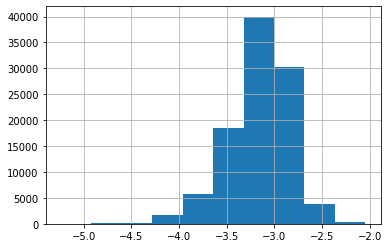

In [680]:
np.log10(airbnb_geo.bodegas_dist).hist()

In [710]:
airbnb_geo.describe().iloc[:,0:13]

,id,price,number_of_reviews,review_scores_rating,month_count,year,accommodates,accommodates_squared,adjusted_price,adjusted_score,bathrooms,bedrooms,bedrooms_per_bathrooms
count,1.007460e+05,100746.000000,100746.000000,100746.000000,100746.000000,100746.00000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000
mean,1.233559e+07,202.874079,57.611776,93.414776,18.340698,2017.43698,4.186161,20.570792,200.720450,-1.111114,1.127330,1.562772,1.412768
std,9.201318e+06,98.241781,58.136351,5.345994,11.187866,1.03027,1.745530,16.738367,97.215595,0.248651,0.353413,0.719651,0.606088
min,3.831000e+03,39.000000,4.000000,50.000000,3.000000,2016.00000,1.000000,1.000000,38.373391,-1.602060,1.000000,1.000000,0.500000
25%,3.775259e+06,135.000000,17.000000,91.000000,9.000000,2017.00000,3.000000,9.000000,133.414771,-1.259637,1.000000,1.000000,1.000000
50%,1.163678e+07,180.000000,38.000000,95.000000,16.000000,2018.00000,4.000000,16.000000,177.144662,-1.124939,1.000000,1.000000,1.000000
75%,1.986223e+07,250.000000,78.000000,97.000000,26.000000,2018.00000,5.000000,25.000000,246.034253,-0.939302,1.000000,2.000000,2.000000
max,3.526248e+07,600.000000,467.000000,100.000000,41.000000,2019.00000,9.000000,81.000000,600.000000,-0.279841,4.000000,5.000000,5.000000


In [711]:
airbnb_geo.describe().iloc[:,13:26]

,beds,log_beds_per_bedrooms,log_beds_per_bedrooms_squared,log_price,log_reviews,month,month_squared,years_since_2015,years_since_2015_squared,cafes_count,bars_count,food_count,trains_count
count,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.00000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000
mean,2.157495,0.123964,0.042146,2.258174,1.558234,6.397922,51.790572,2.43698,7.000318,42.660384,87.095101,372.288379,26.480992
std,1.120202,0.163642,0.068971,0.193669,0.436270,3.295039,44.439523,1.03027,5.103975,40.909117,86.822300,327.795890,24.842453
min,1.000000,-0.477121,0.000000,1.584030,0.602060,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,0.000000,2.125204,1.230449,4.000000,16.000000,2.00000,4.000000,14.000000,19.000000,120.000000,10.000000
50%,2.000000,0.000000,0.000000,2.248328,1.579784,6.000000,36.000000,3.00000,9.000000,26.000000,48.000000,212.000000,18.000000
75%,3.000000,0.301030,0.090619,2.390996,1.892095,9.000000,81.000000,3.00000,9.000000,59.000000,147.000000,635.000000,34.000000
max,8.000000,0.903090,0.815572,2.778151,2.669317,12.000000,144.000000,4.00000,16.000000,196.000000,329.000000,1429.000000,133.000000


In [712]:
airbnb_geo.describe().iloc[:,26:39]

,spots_count,bodegas_count,cafes_dist,bars_dist,food_dist,trains_dist,spots_dist,bodegas_dist
count,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000,100746.000000
mean,0.096649,110.336807,0.001700,0.001782,0.000759,0.003286,0.025281,0.000886
std,0.295481,43.616533,0.001450,0.002647,0.000675,0.002567,0.016908,0.000633
min,0.000000,1.000000,0.000011,0.000013,0.000003,0.000026,0.000109,0.000006
25%,0.000000,82.000000,0.000739,0.000546,0.000287,0.001648,0.013620,0.000463
50%,0.000000,107.000000,0.001303,0.001035,0.000567,0.002756,0.020946,0.000774
75%,0.000000,129.000000,0.002208,0.001963,0.001022,0.004230,0.031890,0.001143
max,1.000000,276.000000,0.020430,0.034887,0.008326,0.035443,0.114098,0.008971


In [1122]:
nyc_geo.to_pickle("./data/geos/nyc.pkl")
bad_geo.to_pickle("./data/geos/jersey.pkl")
line_geo.to_pickle("./data/geos/lines.pkl")


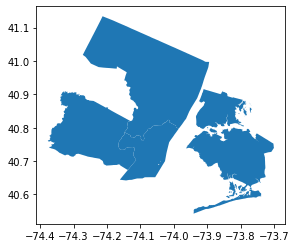

In [1120]:
bad_geo.plot()

In [1117]:
bad_geo = bad_geo[
    ( bad_geo.geometry.centroid.y > 40.6 ) &
    ( bad_geo.geometry.centroid.x > -74.3 )
]

In [1123]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}


NameError: name 'airbnb' is not defined

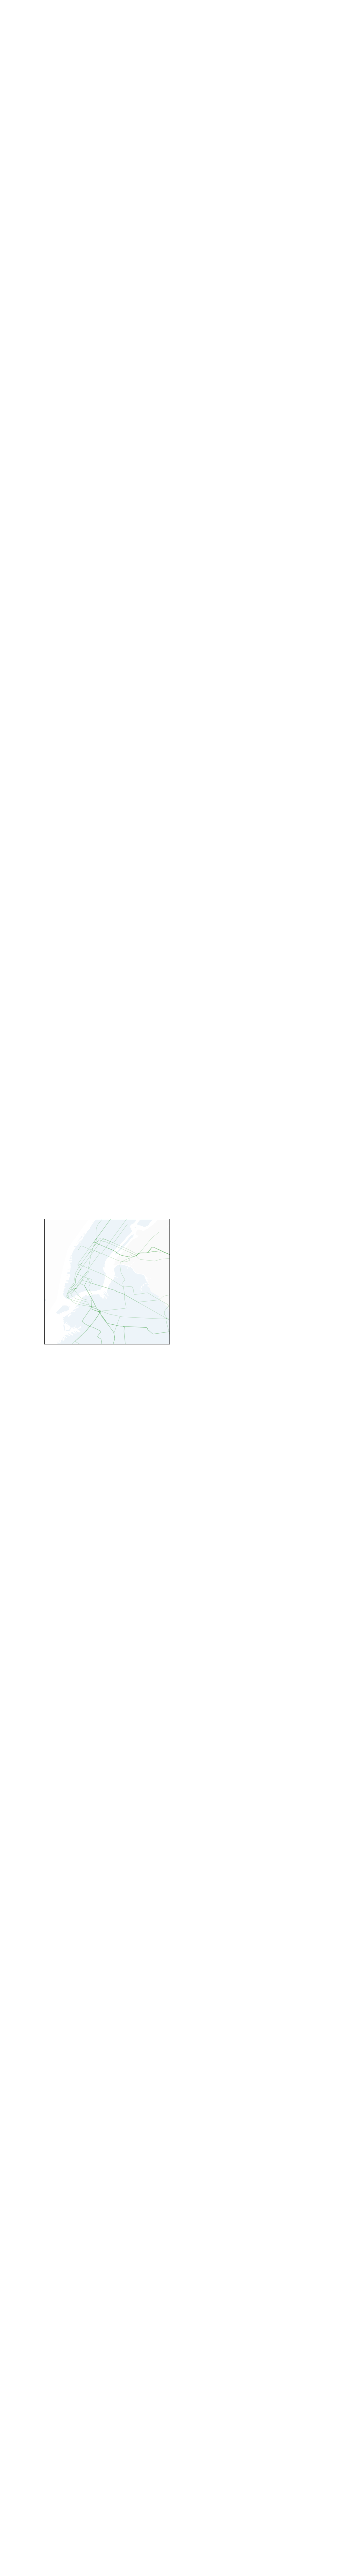

In [1124]:
plt.figure(figsize=(16,116))

# sphinx_gallery_thumbnail_number = 3

ax = plt.subplot(1,2,1)

nyc_geo.plot(ax=ax, alpha=0.08)
bad_geo.plot(ax=ax, alpha=0.025, cmap="gray")
line_geo.plot(ax=ax, alpha=0.16, edgecolor="green")

plt.xlim(-74.04, -73.9)
plt.ylim(40.65, 40.79)

plt.xticks((), ())
plt.yticks((), ())

# airbnb_geo.drop_duplicates(subset=["id", "geometry"]).plot(ax=ax, c=cur_blue, alpha=0.055)
# hotspots_geo.plot(ax=ax, c=cur_pink, alpha=1, markersize=100)
# mta_geo.drop_duplicates(["geometry"]).plot(ax=ax, c=cur_purple, alpha=0.16)

# ax = plt.subplot(1,2,2)

# nyc_geo.plot(ax=ax, alpha=0.08)
# bad_geo.plot(ax=ax, alpha=0.025, cmap="gray")
# line_geo.plot(ax=ax, alpha=0.16, edgecolor="green")

# plt.xlim(-74.04, -73.9)
# plt.ylim(40.65, 40.79)

# plt.xticks((), ())
# plt.yticks((), ())

# hotspots_geo.plot(ax=ax, c=cur_pink, alpha=1, markersize=100)
# mta_geo.drop_duplicates(["geometry"]).plot(ax=ax, c=cur_purple, alpha=0.16)

# bar_geo.plot(ax=ax, c='g', alpha=0.04)
# # food_geo.plot(ax=ax, c='teal', alpha=0.05)
# cafe_geo.plot(ax=ax, c=cur_orange, alpha=0.16)
# # bodega_geo.plot(ax=ax, c=cur_yellow, alpha=0.10)



pass


In [1125]:
class Hotspot():
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

hotspots = []
hotspots.append(Hotspot("Union Square", 40.735556, -73.990556))
hotspots.append(Hotspot("Central Park", 40.782222, -73.965278))

hotspots.append(Hotspot("Bedford Stop", 40.71772, -73.95756))
hotspots.append(Hotspot("Prospect Park", 40.661667, -73.970833))

hotspots_data = pd.DataFrame.from_records(
    [cur_hotspot.__dict__ for cur_hotspot in hotspots]
)

hotspots_data

hotspots_geo = geopandas.GeoDataFrame(
    hotspots_data, geometry=geopandas.points_from_xy(
        hotspots_data.longitude, hotspots_data.latitude
    )
).drop(columns=["latitude","longitude"])

hotspots_geo

,name,geometry
0,Union Square,POINT (-73.99056 40.73556)
1,Central Park,POINT (-73.96528 40.78222)
2,Bedford Stop,POINT (-73.95756 40.71772)
3,Prospect Park,POINT (-73.97083 40.66167)


In [909]:

work_ids = []
unique_food = []
unique_lines = []

for cur_rental in tqdm(airbnb_geo.itertuples(), total=airbnb_geo.shape[0]):
    
    work_point = cur_rental.geometry
    cur_buffer = work_point.buffer(0.009)
    
    if len(work_ids) > 0 and cur_rental.id == work_ids[-1] : 
        work_ids.append(cur_rental.id)
        unique_food.append(unique_food[-1])
        unique_lines.append(unique_lines[-1])
        continue
    
    close_rows = food_geo[food_geo.within(cur_buffer)]
    close_list = close_rows.cuisine.values
    cur_lines = len(set(itertools.chain(*close_list)))
    unique_food.append(cur_lines)

    close_rows = mta_geo[mta_geo.within(cur_buffer)]
    close_list = close_rows.lines.values
    cur_lines = len(set(itertools.chain(*close_list)))
    unique_lines.append(cur_lines)
    
    work_ids.append(cur_rental.id)
    

(array([18505., 43222., 18513., 13605.,  3734.,  1790.,   948.,   229.,
           76.,   124.]),
 array([-0.42276359, -0.38726241, -0.35176123, -0.31626005, -0.28075887,
        -0.24525769, -0.20975651, -0.17425533, -0.13875415, -0.10325297,
        -0.06775178]),
 <a list of 10 Patch objects>)

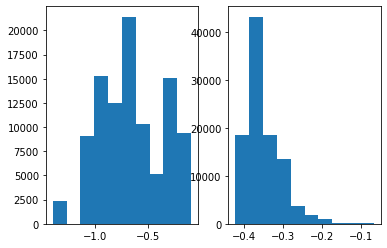

In [913]:
max_lines_count = 25
norm_unique_lines = np.log10(
    ( 
        1 + np.array(unique_lines)
    ) / 
    max_lines_count
)

max_food_count = 90
norm_unique_food = np.log10(
    1 - (
        np.array(unique_food) /
        max_food_count
    )
)

plt.subplot(1,2,1)
plt.hist(norm_unique_lines)

plt.subplot(1,2,2)
plt.hist(norm_unique_food)


In [911]:
airbnb_geo["norm_unique_lines"] = norm_unique_lines
airbnb_geo["norm_unique_food"] = norm_unique_food


In [946]:
count_cols = [ tmp_col for tmp_col in airbnb_geo.columns if tmp_col.endswith("_count") and tmp_col != "month_count" ]
dist_cols = [ tmp_col for tmp_col in airbnb_geo.columns if tmp_col.endswith("_dist") ]

for work_col in dist_cols:
    airbnb_geo[f"log_{work_col}"] = np.log10(airbnb_geo[work_col])
    
for work_col in count_cols:
    airbnb_geo[f"log_{work_col}"] = np.log10(1+airbnb_geo[work_col])


In [948]:
airbnb_geo = airbnb_geo.drop(columns=['log_{work_col}'])

In [955]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

def hist_plot(cur_col,use_log):
    dd = airbnb_geo[cur_col]
    if type(dd.iloc[0]) == np.bool_: 
        dd = dd.astype(int)
    
    if use_log:
        if cur_col.endswith("_count"):
            np.log10(1+dd).hist()
        else:
            np.log10(dd).hist()
    else:
        dd.hist()

interact(
    hist_plot, 
    cur_col=airbnb_geo.columns,
    use_log=False
);


interactive(children=(Dropdown(description='cur_col', options=('id', 'neighbourhood_group', 'neighbourhood', '…

In [1082]:
airbnb_geo.to_pickle(f"./data/geos/airbnb.pkl")

geo_input = {
    "cafes": cafe_geo,
    "bars": bar_geo,
    "food": food_geo,
    "trains": mta_geo,
    "spots": hotspots_geo,
    "bodegas": bodega_geo
}

for cur_key, cur_db in geo_input.items():
    cur_db.to_pickle(f"./data/geos/{cur_key}.pkl")

In [957]:
for cur_col in airbnb_geo.columns:
    print(cur_col)

id
neighbourhood_group
neighbourhood
price
number_of_reviews
review_scores_rating
property_type
month_count
date
year
accommodates
accommodates_squared
adjusted_price
adjusted_score
bathrooms
bedrooms
bedrooms_per_bathrooms
beds
is_april
is_august
is_december
is_february
is_january
is_june
is_march
is_may
is_november
is_october
is_september
is_summer
is_winter
log_beds_per_bedrooms
log_beds_per_bedrooms_squared
log_price
log_reviews
month
month_squared
years_since_2015
years_since_2015_squared
is_brooklyn
is_house
is_loft
is_townhouse
is_condominium
geometry
cafes_count
bars_count
food_count
trains_count
spots_count
bodegas_count
cafes_dist
bars_dist
food_dist
trains_dist
spots_dist
bodegas_dist
norm_unique_lines
norm_unique_food
log_cafes_dist
log_bars_dist
log_food_dist
log_trains_dist
log_spots_dist
log_bodegas_dist
log_cafes_count
log_bars_count
log_food_count
log_trains_count
log_spots_count
log_bodegas_count


In [ ]:
skipped_for_brooklyn_sweep = [
    'is_february',
    'is_january',
    'is_march',
    'is_november',
    'log_bars_count',
    'month_squared',
    'is_april',
    'is_august',
    'is_june',
    'is_brooklyn_accommodates_squared',
    'is_brooklyn_bedrooms',
    'is_brooklyn_beds',
    'is_brooklyn_is_august',
    'is_brooklyn_is_december',
    'is_brooklyn_is_january',
    'is_brooklyn_is_september',
    'is_brooklyn_is_winter',
    'is_brooklyn_log_bodegas_dist',
    'is_brooklyn_log_cafes_dist',
    'is_brooklyn_month',
    'is_brooklyn_month_squared',
    'is_brooklyn_years_since_2015_squared',
    'is_brooklyn_is_may',
    'is_brooklyn_is_november',
    'is_brooklyn_is_summer',
    'is_brooklyn_years_since_2015',
    'is_brooklyn_is_april',
    'is_brooklyn_is_february',
    'is_september',
    'is_brooklyn_is_june',
    'log_beds_per_bedrooms',
    'is_brooklyn_is_loft',
    'is_brooklyn_is_condominium',
    'is_summer',
    'is_brooklyn_is_october'
]

skipped_for_standard = [
    'bedrooms_per_bathrooms',
    'is_april',
    'is_august',
    'is_january',
    'is_june',
    'is_november',
    'month_squared',
    'log_beds_per_bedrooms',
    'month',
]

In [1080]:
repeated_columns = [
    "accommodates",
    "accommodates_squared",
    "bathrooms",
    "bedrooms",
    "bedrooms_per_bathrooms",
    "beds",
    "is_april",
    "is_august",
    "is_brooklyn",
    "is_condominium",
    "is_december",
    "is_february",
    "is_house",
    "is_january",
    "is_june",
    "is_loft",
    "is_march",
    "is_may",
    "is_november",
    "is_october",
    "is_september",
    "is_summer",
    "is_townhouse",
    "is_winter",
    "log_bars_count",
    "log_bars_dist",
    "log_beds_per_bedrooms",
    "log_beds_per_bedrooms_squared",
    "log_bodegas_count",
    "log_bodegas_dist",
    "log_cafes_count",
    "log_cafes_dist",
    "log_food_count",
    "log_food_dist",
    "log_spots_count",
    "log_spots_dist",
    "log_trains_count",
    "log_trains_dist",
    "month",
    "month_squared",
    "norm_unique_food",
    "norm_unique_lines",
    "years_since_2015",
    "years_since_2015_squared"
]

repeated_columns.remove("is_brooklyn")

for work_col in repeated_columns:
    old_col = airbnb_geo[work_col]
    if old_col.dtype == bool:
        new_col = airbnb_geo.is_brooklyn & old_col
    else:
        new_col = airbnb_geo.is_brooklyn * old_col
    airbnb_geo[f"is_brooklyn_{work_col}"] = new_col
        
used_columns = repeated_columns.copy()

used_columns.extend(
    [ f"is_brooklyn_{tmp_col}" for tmp_col in repeated_columns ]
)

# unused_columns = [
#     'is_february',
#     'is_january',
#     'is_march',
#     'is_november',
#     'log_bars_count',
#     'month_squared',
#     'is_april',
#     'is_august',
#     'is_june',
#     'is_brooklyn_accommodates_squared',
#     'is_brooklyn_bedrooms',
#     'is_brooklyn_beds',
#     'is_brooklyn_is_august',
#     'is_brooklyn_is_december',
#     'is_brooklyn_is_january',
#     'is_brooklyn_is_september',
#     'is_brooklyn_is_winter',
#     'is_brooklyn_log_bodegas_dist',
#     'is_brooklyn_log_cafes_dist',
#     'is_brooklyn_month',
#     'is_brooklyn_month_squared',
#     'is_brooklyn_years_since_2015_squared',
#     'is_brooklyn_is_may',
#     'is_brooklyn_is_november',
#     'is_brooklyn_is_summer',
#     'is_brooklyn_years_since_2015',
#     'is_brooklyn_is_april',
#     'is_brooklyn_is_february',
#     'is_september',
#     'is_brooklyn_is_june',
#     'log_beds_per_bedrooms',
#     'is_brooklyn_is_loft',
#     'is_brooklyn_is_condominium',
#     'is_summer',
#     'is_brooklyn_is_october'
# ]

unused_columns = [
    'bedrooms_per_bathrooms',
    'is_april',
    'is_august',
    'is_january',
    'is_june',
    'is_november',
    'month_squared',
    'log_beds_per_bedrooms',
    'month',
]

used_columns = [
    used_col for used_col in used_columns if used_col not in unused_columns
]

used_columns = [
    used_col for used_col in used_columns if not used_col.startswith("is_brooklyn_")
]

len(used_columns)


34

In [1074]:
subset_data = airbnb_geo[[*used_columns,"id","log_price"]]

used_data = subset_data[~subset_data.id.isin(reserved_ids)].drop(columns=['id'])
reserved_data = subset_data[subset_data.id.isin(reserved_ids)].drop(columns=['id'])

test_size = ( 0.2 * len(airbnb_geo) - len(reserved_data) ) / len(used_data)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    used_data.loc[:, used_data.columns != 'log_price'], used_data.log_price, test_size=test_size
)

work_data = X_test.copy()
work_data["log_price"] = y_test.values

reserved_data = reserved_data.drop(columns=['log_price']).assign(log_price=reserved_data['log_price'])
work_data = pd.concat([work_data,reserved_data],sort=True)

work_data = work_data.sample(frac=1).reset_index(drop=True)

X_test = work_data.loc[:, work_data.columns != 'log_price']
y_test = work_data.log_price

print(round(len(X_train)/len(airbnb_geo),4))
print(round(len(X_test)/len(airbnb_geo),4))

cur_poly_xform = StandardScaler()
cur_poly_xform.fit(X_train.values)

X_train_scaled = cur_poly_xform.transform(X_train.values)
X_test_scaled = cur_poly_xform.transform(X_test.values)


from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

in_dict = {
#     "ridge": RidgeCV(cv=4, alphas=np.logspace(-2,2,150)),
    "lasso": LassoCV(cv=4, n_alphas=150, n_jobs=-1), 
#     "elastic": ElasticNetCV(cv=4, n_alphas=150, n_jobs=-1)
}

out_dict = {}

for cur_key, cur_cv in in_dict.items():
    cur_cv.fit(X_train_scaled, y_train)
#     out_dict[cur_key] = cur_cv.score(X_test_scaled, y_test)
    out_dict[cur_key] = cur_cv.score(X_train_scaled, y_train)
    print([cur_key, out_dict[cur_key]])
    
cur_cv = in_dict['lasso']

for cur_key, cur_cv in in_dict.items():
    print([cur_key,cur_cv.alpha_,cur_cv.intercept_])
    for ii in range(len(X_train.columns)):
        if abs(cur_cv.coef_[ii]) > 1e-6: continue
        print(f"    '{X_train.columns[ii]}',")


0.8
0.2
['lasso', 0.5255686508380069]
['lasso', 9.127296657819074e-05, 2.2580592208781622]


In [1075]:
print_list = []
for cur_key, cur_cv in in_dict.items():
    print()
    print([cur_key,cur_cv.alpha_,out_dict[cur_key]])
    for ii in range(len(X_train.columns)):
        if abs(cur_cv.coef_[ii]) <= 1e-3: continue
        print_list.append(
            [X_train.columns[ii], cur_cv.coef_[ii]]
        )
    break
     
for cur_print in reversed(sorted(print_list, key = lambda x: np.abs(x[1]))):
    print(cur_print)
    


['lasso', 9.127296657819074e-05, 0.5255686508380069]
['log_food_count', 0.0765230436925299]
['accommodates', 0.06109494345408621]
['bedrooms', 0.0426002074725976]
['log_bodegas_count', -0.041832585278191656]
['bathrooms', 0.037140210813845824]
['log_cafes_count', 0.03268533217198163]
['accommodates_squared', -0.028554091674474175]
['log_spots_dist', -0.019048780863930154]
['is_loft', 0.0177034285392857]
['log_bars_count', 0.012943045875644866]
['is_condominium', 0.010776472897185906]
['years_since_2015_squared', 0.010056754080161696]
['years_since_2015', -0.008641921284230972]
['log_trains_count', 0.006777308244793588]
['norm_unique_food', 0.006768413521883435]
['log_spots_count', -0.005060218793808612]
['log_bodegas_dist', 0.0044210033609471365]
['log_food_dist', 0.004007731554527764]
['beds', 0.0032768804428669964]
['is_townhouse', 0.0027875507182888674]
['log_beds_per_bedrooms_squared', -0.0027138844565485713]
['log_bars_dist', -0.002538493966324953]
['log_cafes_dist', 0.0021362651

In [1081]:
base_cols = repeated_columns.copy()

base_cols


['accommodates',
 'accommodates_squared',
 'bathrooms',
 'bedrooms',
 'bedrooms_per_bathrooms',
 'beds',
 'is_april',
 'is_august',
 'is_condominium',
 'is_december',
 'is_february',
 'is_house',
 'is_january',
 'is_june',
 'is_loft',
 'is_march',
 'is_may',
 'is_november',
 'is_october',
 'is_september',
 'is_summer',
 'is_townhouse',
 'is_winter',
 'log_bars_count',
 'log_bars_dist',
 'log_beds_per_bedrooms',
 'log_beds_per_bedrooms_squared',
 'log_bodegas_count',
 'log_bodegas_dist',
 'log_cafes_count',
 'log_cafes_dist',
 'log_food_count',
 'log_food_dist',
 'log_spots_count',
 'log_spots_dist',
 'log_trains_count',
 'log_trains_dist',
 'month',
 'month_squared',
 'norm_unique_food',
 'norm_unique_lines',
 'years_since_2015',
 'years_since_2015_squared']